# 1) Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Customer Churn.csv'
data = pd.read_csv(file_path)
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [2]:
# Rows and Columns
data.shape

(3150, 14)

In [3]:
# Info of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
# Statistical Properties
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


# 2) Data Preparation

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [6]:
# Separating features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

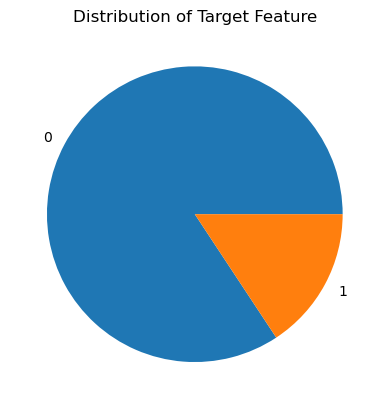

In [7]:
# Distribution of Target Feature
y.value_counts().plot(kind="pie")
plt.ylabel("")
plt.title("Distribution of Target Feature")
plt.show()

In [8]:
# Balancing data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()

X, y = sampler.fit_resample(X, y)

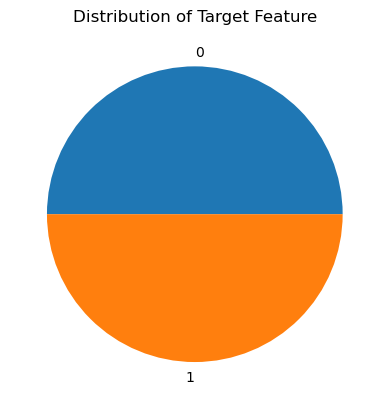

In [9]:
# Distribution of Target Feature after balancing
y.value_counts().plot(kind="pie")
plt.ylabel("")
plt.title("Distribution of Target Feature")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# from sklearn.model_selection import train_test_split

# # Splitting the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 3) Modeling

In [12]:
from sklearn.metrics import confusion_matrix

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Existing metrics
    fpr = fp / (fp + tn)  # False Positive Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    tss = tp / (tp + fn) - fp / (fp + tn)  # True Skill Statistics
    hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))  # Heidke Skill Score
    
    # New metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)  # Accuracy
    precision = tp / (tp + fp) if tp + fp != 0 else 0  # Precision
    recall = tp / (tp + fn) if tp + fn != 0 else 0  # Recall
    
    return {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn, 
        'FPR': round(fpr, 3), 'FNR': round(fnr, 3), 'TSS': round(tss, 3), 'HSS': round(hss, 3),
        'Accuracy': round(accuracy, 3), 'Precision': round(precision, 3), 'Recall': round(recall, 3)
    }, confusion_matrix(y_true, y_pred)

In [13]:
from sklearn.model_selection import KFold

def cross_validation_metrics(model, X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics_list = []

    for i, (train_index, test_index) in enumerate(kf.split(X), start=1):
        # Splitting the data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Training and predicting
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculating metrics
        res, conf = calculate_metrics(y_test, predictions)
        metrics_list.append(res)

        # Printing results
        print("="*100)
        print(f" Fold-{i} Results ".center(100))
        print("="*100)
        for k, v in res.items():
            print(f"{k} : {v}")
        
        # Plotting confusion matrix
        plt.figure(figsize=(4,3))
        sns.heatmap(conf, annot=True, fmt=".0f", cmap="Blues")
        plt.xlabel("True Labels")
        plt.ylabel("Predicted Labels")
        plt.show()

    return metrics_list

## 3.1) Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

                                           Fold-1 Results                                           
TP : 267
TN : 251
FP : 9
FN : 4
FPR : 0.035
FNR : 0.015
TSS : 0.951
HSS : 0.951
Accuracy : 0.976
Precision : 0.967
Recall : 0.985


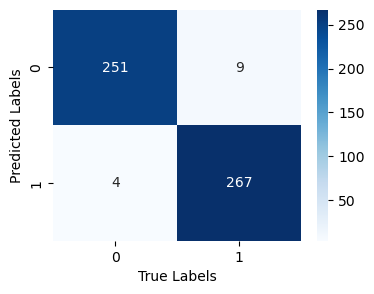

                                           Fold-2 Results                                           
TP : 257
TN : 261
FP : 11
FN : 2
FPR : 0.04
FNR : 0.008
TSS : 0.952
HSS : 0.951
Accuracy : 0.976
Precision : 0.959
Recall : 0.992


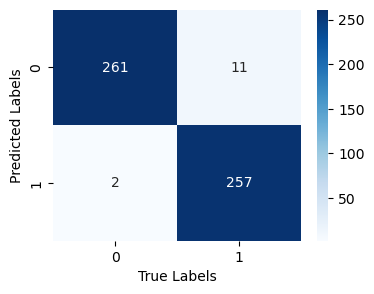

                                           Fold-3 Results                                           
TP : 263
TN : 255
FP : 9
FN : 4
FPR : 0.034
FNR : 0.015
TSS : 0.951
HSS : 0.951
Accuracy : 0.976
Precision : 0.967
Recall : 0.985


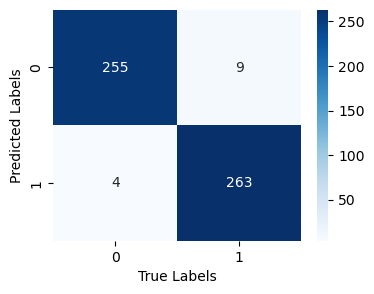

                                           Fold-4 Results                                           
TP : 257
TN : 258
FP : 8
FN : 8
FPR : 0.03
FNR : 0.03
TSS : 0.94
HSS : 0.94
Accuracy : 0.97
Precision : 0.97
Recall : 0.97


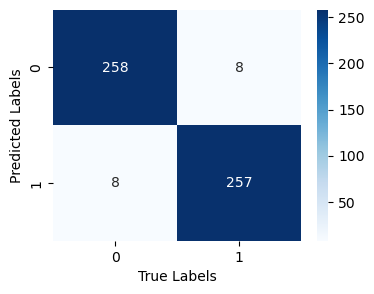

                                           Fold-5 Results                                           
TP : 268
TN : 248
FP : 13
FN : 2
FPR : 0.05
FNR : 0.007
TSS : 0.943
HSS : 0.943
Accuracy : 0.972
Precision : 0.954
Recall : 0.993


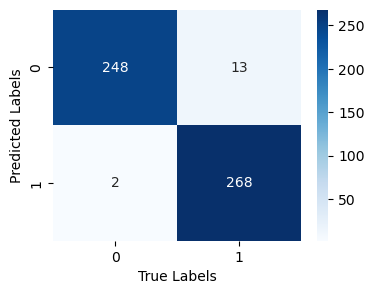

                                           Fold-6 Results                                           
TP : 265
TN : 252
FP : 12
FN : 2
FPR : 0.045
FNR : 0.007
TSS : 0.947
HSS : 0.947
Accuracy : 0.974
Precision : 0.957
Recall : 0.993


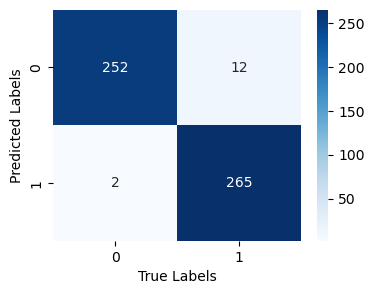

                                           Fold-7 Results                                           
TP : 261
TN : 256
FP : 11
FN : 3
FPR : 0.041
FNR : 0.011
TSS : 0.947
HSS : 0.947
Accuracy : 0.974
Precision : 0.96
Recall : 0.989


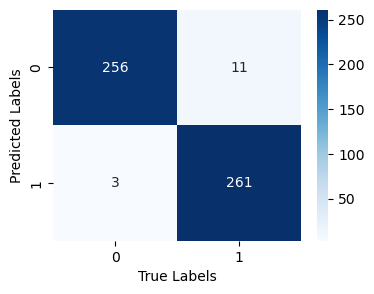

                                           Fold-8 Results                                           
TP : 250
TN : 265
FP : 11
FN : 5
FPR : 0.04
FNR : 0.02
TSS : 0.941
HSS : 0.94
Accuracy : 0.97
Precision : 0.958
Recall : 0.98


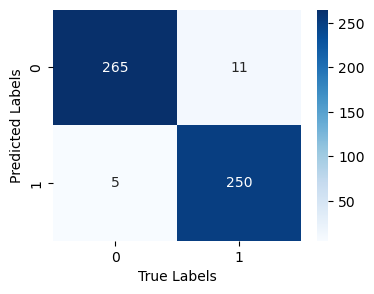

                                           Fold-9 Results                                           
TP : 276
TN : 244
FP : 10
FN : 1
FPR : 0.039
FNR : 0.004
TSS : 0.957
HSS : 0.958
Accuracy : 0.979
Precision : 0.965
Recall : 0.996


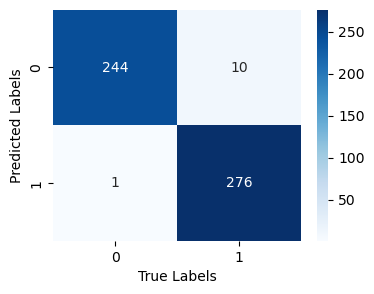

                                          Fold-10 Results                                           
TP : 258
TN : 262
FP : 9
FN : 2
FPR : 0.033
FNR : 0.008
TSS : 0.959
HSS : 0.959
Accuracy : 0.979
Precision : 0.966
Recall : 0.992


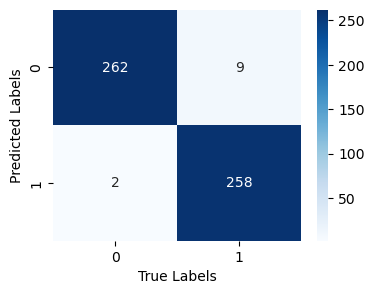

In [15]:
# Modeling and finding results
rf_metrics = cross_validation_metrics(random_forest, X, y, n_splits=10)

In [16]:
# All fold results
all_fold_rf_res = pd.DataFrame(rf_metrics, index=[f"Fold_{i}" for i in range(1, 11)])
display(all_fold_rf_res)

# Average metrics across all folds for Random Forest
print("\n\n\n\nAverage Results of all Folds")
rf_average_metrics = all_fold_rf_res.mean()
rf_average_metrics

,TP,TN,FP,FN,FPR,FNR,TSS,HSS,Accuracy,Precision,Recall
Fold_1,267,251,9,4,0.035,0.015,0.951,0.951,0.976,0.967,0.985
Fold_2,257,261,11,2,0.040,0.008,0.952,0.951,0.976,0.959,0.992
Fold_3,263,255,9,4,0.034,0.015,0.951,0.951,0.976,0.967,0.985
Fold_4,257,258,8,8,0.030,0.030,0.940,0.940,0.970,0.970,0.970
Fold_5,268,248,13,2,0.050,0.007,0.943,0.943,0.972,0.954,0.993
Fold_6,265,252,12,2,0.045,0.007,0.947,0.947,0.974,0.957,0.993
Fold_7,261,256,11,3,0.041,0.011,0.947,0.947,0.974,0.960,0.989
Fold_8,250,265,11,5,0.040,0.020,0.941,0.940,0.970,0.958,0.980
Fold_9,276,244,10,1,0.039,0.004,0.957,0.958,0.979,0.965,0.996
Fold_10,258,262,9,2,0.033,0.008,0.959,0.959,0.979,0.966,0.992






Average Results of all Folds


TP           262.2000
TN           255.2000
FP            10.3000
FN             3.3000
FPR            0.0387
FNR            0.0125
TSS            0.9488
HSS            0.9487
Accuracy       0.9746
Precision      0.9623
Recall         0.9875
dtype: float64

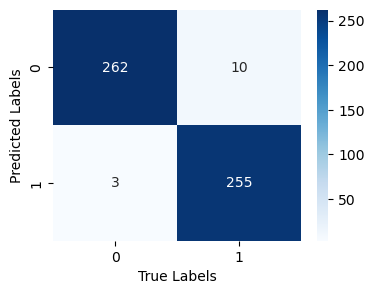

In [17]:
# Average COnfusion Matrix
avg_conf_rf = [[rf_average_metrics["TP"], rf_average_metrics["FP"]],
              [rf_average_metrics["FN"], rf_average_metrics["TN"]]]

plt.figure(figsize=(4,3))
sns.heatmap(avg_conf_rf, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

## 3.2) K Nearest Neighbor

                                           Fold-1 Results                                           
TP : 259
TN : 226
FP : 34
FN : 12
FPR : 0.131
FNR : 0.044
TSS : 0.825
HSS : 0.826
Accuracy : 0.913
Precision : 0.884
Recall : 0.956


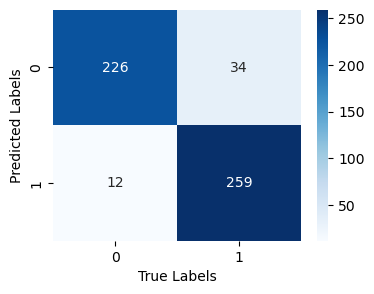

                                           Fold-2 Results                                           
TP : 254
TN : 224
FP : 48
FN : 5
FPR : 0.176
FNR : 0.019
TSS : 0.804
HSS : 0.801
Accuracy : 0.9
Precision : 0.841
Recall : 0.981


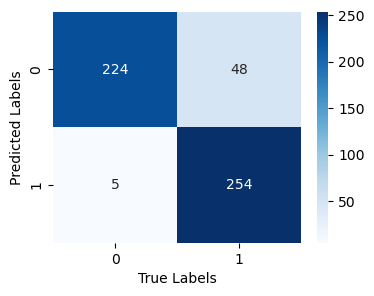

                                           Fold-3 Results                                           
TP : 241
TN : 219
FP : 45
FN : 26
FPR : 0.17
FNR : 0.097
TSS : 0.732
HSS : 0.732
Accuracy : 0.866
Precision : 0.843
Recall : 0.903


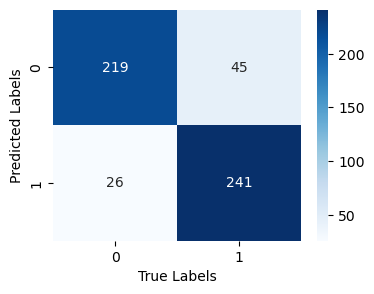

                                           Fold-4 Results                                           
TP : 249
TN : 220
FP : 46
FN : 16
FPR : 0.173
FNR : 0.06
TSS : 0.767
HSS : 0.767
Accuracy : 0.883
Precision : 0.844
Recall : 0.94


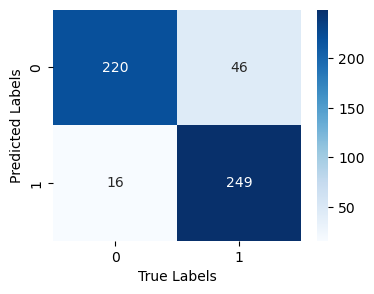

                                           Fold-5 Results                                           
TP : 264
TN : 225
FP : 36
FN : 6
FPR : 0.138
FNR : 0.022
TSS : 0.84
HSS : 0.841
Accuracy : 0.921
Precision : 0.88
Recall : 0.978


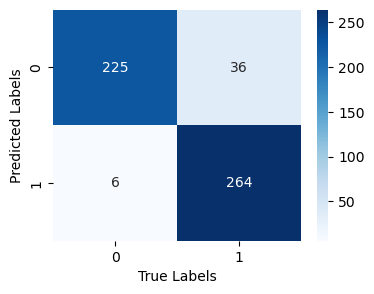

                                           Fold-6 Results                                           
TP : 259
TN : 222
FP : 42
FN : 8
FPR : 0.159
FNR : 0.03
TSS : 0.811
HSS : 0.812
Accuracy : 0.906
Precision : 0.86
Recall : 0.97


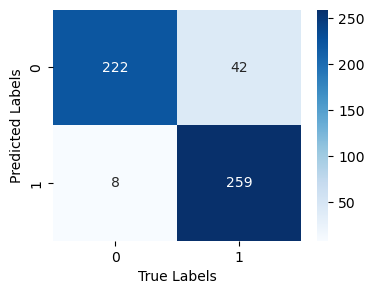

                                           Fold-7 Results                                           
TP : 242
TN : 219
FP : 48
FN : 22
FPR : 0.18
FNR : 0.083
TSS : 0.737
HSS : 0.736
Accuracy : 0.868
Precision : 0.834
Recall : 0.917


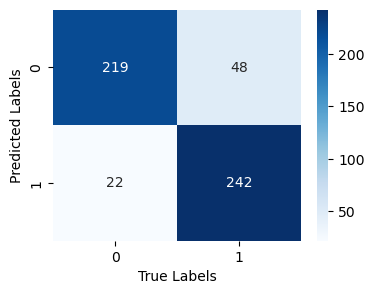

                                           Fold-8 Results                                           
TP : 239
TN : 232
FP : 44
FN : 16
FPR : 0.159
FNR : 0.063
TSS : 0.778
HSS : 0.775
Accuracy : 0.887
Precision : 0.845
Recall : 0.937


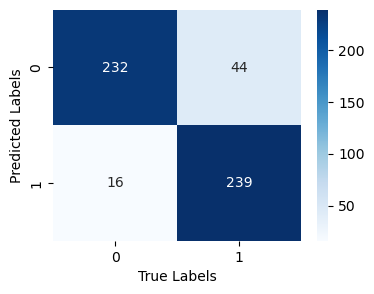

                                           Fold-9 Results                                           
TP : 257
TN : 221
FP : 33
FN : 20
FPR : 0.13
FNR : 0.072
TSS : 0.798
HSS : 0.8
Accuracy : 0.9
Precision : 0.886
Recall : 0.928


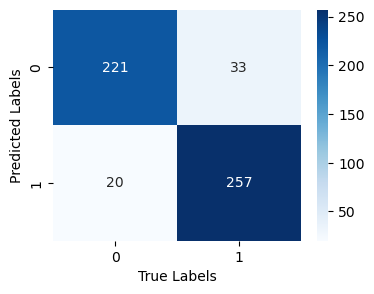

                                          Fold-10 Results                                           
TP : 248
TN : 226
FP : 45
FN : 12
FPR : 0.166
FNR : 0.046
TSS : 0.788
HSS : 0.786
Accuracy : 0.893
Precision : 0.846
Recall : 0.954


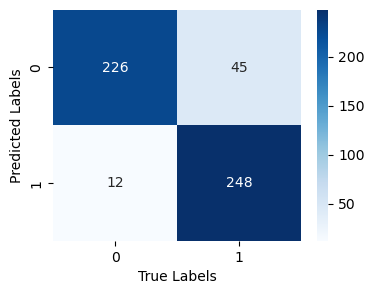

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn_metrics = cross_validation_metrics(knn, X, y, n_splits=10)

In [19]:
# All fold results
all_fold_knn_res = pd.DataFrame(knn_metrics, index=[f"Fold_{i}" for i in range(1, 11)])
display(all_fold_knn_res)

# Average metrics across all folds for KNN
print("\n\n\n\nAverage Results of all Folds")
knn_average_metrics = all_fold_knn_res.mean()
knn_average_metrics

,TP,TN,FP,FN,FPR,FNR,TSS,HSS,Accuracy,Precision,Recall
Fold_1,259,226,34,12,0.131,0.044,0.825,0.826,0.913,0.884,0.956
Fold_2,254,224,48,5,0.176,0.019,0.804,0.801,0.900,0.841,0.981
Fold_3,241,219,45,26,0.170,0.097,0.732,0.732,0.866,0.843,0.903
Fold_4,249,220,46,16,0.173,0.060,0.767,0.767,0.883,0.844,0.940
Fold_5,264,225,36,6,0.138,0.022,0.840,0.841,0.921,0.880,0.978
Fold_6,259,222,42,8,0.159,0.030,0.811,0.812,0.906,0.860,0.970
Fold_7,242,219,48,22,0.180,0.083,0.737,0.736,0.868,0.834,0.917
Fold_8,239,232,44,16,0.159,0.063,0.778,0.775,0.887,0.845,0.937
Fold_9,257,221,33,20,0.130,0.072,0.798,0.800,0.900,0.886,0.928
Fold_10,248,226,45,12,0.166,0.046,0.788,0.786,0.893,0.846,0.954






Average Results of all Folds


TP           251.2000
TN           223.4000
FP            42.1000
FN            14.3000
FPR            0.1582
FNR            0.0536
TSS            0.7880
HSS            0.7876
Accuracy       0.8937
Precision      0.8563
Recall         0.9464
dtype: float64

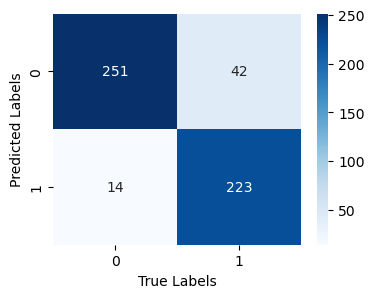

In [20]:
# Average COnfusion Matrix
avg_conf_knn = [[knn_average_metrics["TP"], knn_average_metrics["FP"]],
              [knn_average_metrics["FN"], knn_average_metrics["TN"]]]

plt.figure(figsize=(4,3))
sns.heatmap(avg_conf_knn, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

## 3.3) Conv1D

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Reshape input data for Conv1D
X_reshaped = X.values.reshape((X.shape[0], X.shape[1], 1))

# One-hot encode the target variable for neural network
y_categorical = to_categorical(y)

In [22]:
# Conv1D model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_reshaped.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

                                           Fold-1 Results                                           
TP : 167
TN : 222
FP : 38
FN : 104
FPR : 0.146
FNR : 0.384
TSS : 0.47
HSS : 0.468
Accuracy : 0.733
Precision : 0.815
Recall : 0.616


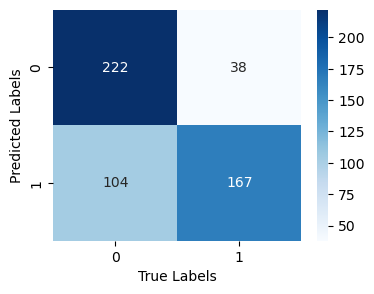

                                           Fold-2 Results                                           
TP : 213
TN : 218
FP : 54
FN : 46
FPR : 0.199
FNR : 0.178
TSS : 0.624
HSS : 0.623
Accuracy : 0.812
Precision : 0.798
Recall : 0.822


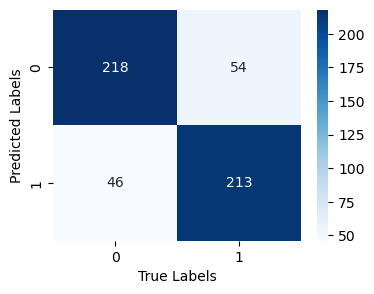

                                           Fold-3 Results                                           
TP : 233
TN : 198
FP : 66
FN : 34
FPR : 0.25
FNR : 0.127
TSS : 0.623
HSS : 0.623
Accuracy : 0.812
Precision : 0.779
Recall : 0.873


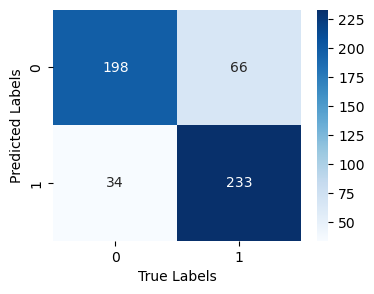

                                           Fold-4 Results                                           
TP : 237
TN : 214
FP : 52
FN : 28
FPR : 0.195
FNR : 0.106
TSS : 0.699
HSS : 0.699
Accuracy : 0.849
Precision : 0.82
Recall : 0.894


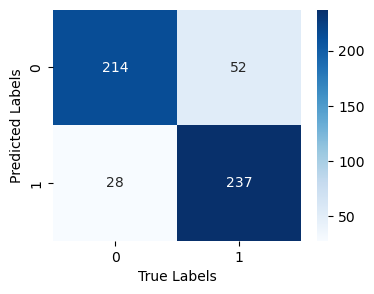

                                           Fold-5 Results                                           
TP : 238
TN : 211
FP : 50
FN : 32
FPR : 0.192
FNR : 0.119
TSS : 0.69
HSS : 0.691
Accuracy : 0.846
Precision : 0.826
Recall : 0.881


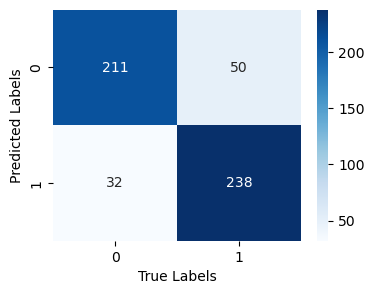

                                           Fold-6 Results                                           
TP : 261
TN : 174
FP : 90
FN : 6
FPR : 0.341
FNR : 0.022
TSS : 0.637
HSS : 0.638
Accuracy : 0.819
Precision : 0.744
Recall : 0.978


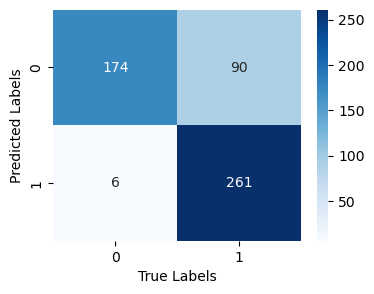

                                           Fold-7 Results                                           
TP : 224
TN : 213
FP : 54
FN : 40
FPR : 0.202
FNR : 0.152
TSS : 0.646
HSS : 0.646
Accuracy : 0.823
Precision : 0.806
Recall : 0.848


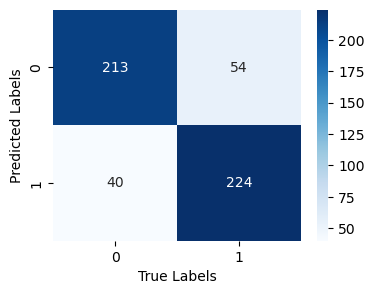

                                           Fold-8 Results                                           
TP : 229
TN : 226
FP : 50
FN : 26
FPR : 0.181
FNR : 0.102
TSS : 0.717
HSS : 0.714
Accuracy : 0.857
Precision : 0.821
Recall : 0.898


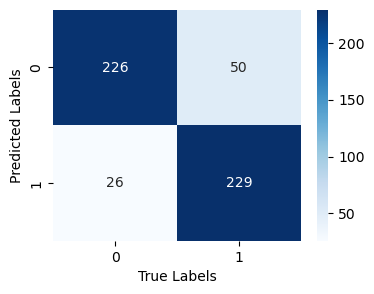

                                           Fold-9 Results                                           
TP : 258
TN : 204
FP : 50
FN : 19
FPR : 0.197
FNR : 0.069
TSS : 0.735
HSS : 0.738
Accuracy : 0.87
Precision : 0.838
Recall : 0.931


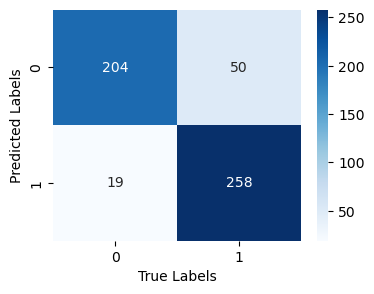

                                          Fold-10 Results                                           
TP : 241
TN : 217
FP : 54
FN : 19
FPR : 0.199
FNR : 0.073
TSS : 0.728
HSS : 0.726
Accuracy : 0.863
Precision : 0.817
Recall : 0.927


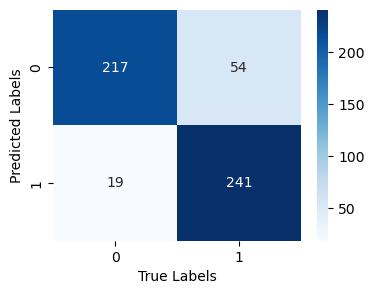

In [23]:
# Initialize KFold for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

metrics_list = []

i=1
# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X_reshaped):
    # Split data
    X_train_fold, X_test_fold = X_reshaped[train_index], X_reshaped[test_index]
    y_train_fold, y_test_fold = y_categorical[train_index], y_categorical[test_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, verbose=0)

    # Predict on the test fold
    y_pred_fold = model.predict(X_test_fold, verbose=0)
    y_pred_fold_class = np.argmax(y_pred_fold, axis=1)
    y_test_fold_class = np.argmax(y_test_fold, axis=1)

    # Calculating metrics
    res, conf = calculate_metrics(y_test_fold_class, y_pred_fold_class)
    metrics_list.append(res)

    # Printing results
    print("="*100)
    print(f" Fold-{i} Results ".center(100))
    print("="*100)
    for k, v in res.items():
        print(f"{k} : {v}")

    i += 1
    # Plotting confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(conf, annot=True, fmt=".0f", cmap="Blues")
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    plt.show()

In [24]:
# All fold results
all_fold_cnn_res = pd.DataFrame(metrics_list, index=[f"Fold_{i}" for i in range(1, 11)])
display(all_fold_cnn_res)

# Average metrics across all folds for KNN
print("\n\n\n\nAverage Results of all Folds")
cnn_average_metrics = all_fold_cnn_res.mean()
cnn_average_metrics

,TP,TN,FP,FN,FPR,FNR,TSS,HSS,Accuracy,Precision,Recall
Fold_1,167,222,38,104,0.146,0.384,0.470,0.468,0.733,0.815,0.616
Fold_2,213,218,54,46,0.199,0.178,0.624,0.623,0.812,0.798,0.822
Fold_3,233,198,66,34,0.250,0.127,0.623,0.623,0.812,0.779,0.873
Fold_4,237,214,52,28,0.195,0.106,0.699,0.699,0.849,0.820,0.894
Fold_5,238,211,50,32,0.192,0.119,0.690,0.691,0.846,0.826,0.881
Fold_6,261,174,90,6,0.341,0.022,0.637,0.638,0.819,0.744,0.978
Fold_7,224,213,54,40,0.202,0.152,0.646,0.646,0.823,0.806,0.848
Fold_8,229,226,50,26,0.181,0.102,0.717,0.714,0.857,0.821,0.898
Fold_9,258,204,50,19,0.197,0.069,0.735,0.738,0.870,0.838,0.931
Fold_10,241,217,54,19,0.199,0.073,0.728,0.726,0.863,0.817,0.927






Average Results of all Folds


TP           230.1000
TN           209.7000
FP            55.8000
FN            35.4000
FPR            0.2102
FNR            0.1332
TSS            0.6569
HSS            0.6566
Accuracy       0.8284
Precision      0.8064
Recall         0.8668
dtype: float64

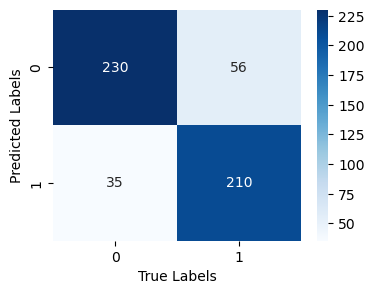

In [25]:
# Average COnfusion Matrix
avg_conf_cnn = [[cnn_average_metrics["TP"], cnn_average_metrics["FP"]],
              [cnn_average_metrics["FN"], cnn_average_metrics["TN"]]]

plt.figure(figsize=(4,3))
sns.heatmap(avg_conf_cnn, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

# Model Comparison

In [26]:
all_res = [rf_average_metrics.to_dict(), knn_average_metrics.to_dict(), cnn_average_metrics.to_dict()]

temp = pd.DataFrame.from_dict(all_res)
temp.index = ["Random Forest", "K Nearest Neighbor", "Convolutional 1D"]
temp

,TP,TN,FP,FN,FPR,FNR,TSS,HSS,Accuracy,Precision,Recall
Random Forest,262.2,255.2,10.3,3.3,0.0387,0.0125,0.9488,0.9487,0.9746,0.9623,0.9875
K Nearest Neighbor,251.2,223.4,42.1,14.3,0.1582,0.0536,0.7880,0.7876,0.8937,0.8563,0.9464
Convolutional 1D,230.1,209.7,55.8,35.4,0.2102,0.1332,0.6569,0.6566,0.8284,0.8064,0.8668


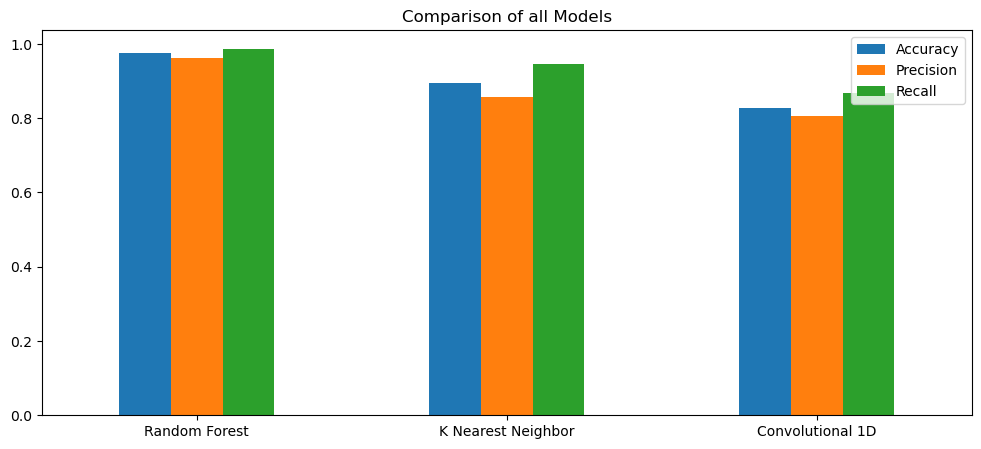

In [27]:
temp[["Accuracy", "Precision", "Recall"]].plot(kind="bar", figsize=(12, 5))
plt.title("Comparison of all Models")
plt.xticks(rotation=0)
plt.show()